In [12]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [13]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Inspect the training and test data

In [14]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(len(test_labels))

(60000, 28, 28)
(60000,)
(10000, 28, 28)
10000


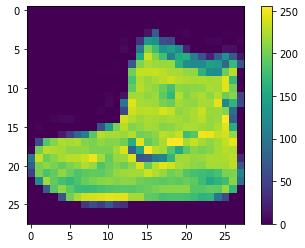

[9 0 0 ... 3 0 5]


In [15]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.show()
print(train_labels)

In [16]:
train_images = train_images / 255.0

test_images = test_images / 255.0

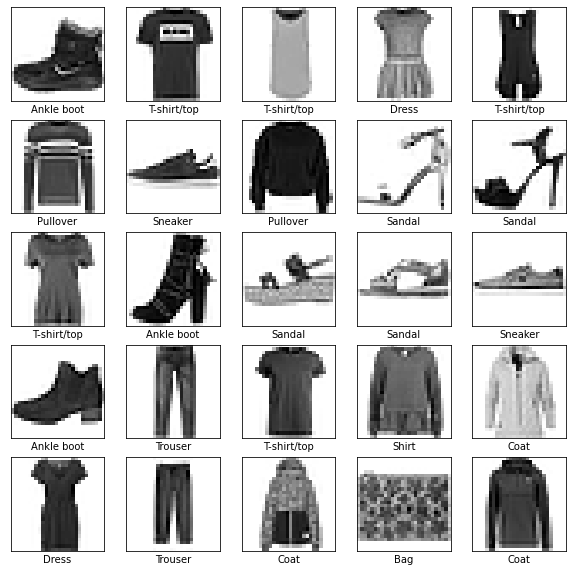

In [17]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Building and Compiling the model

In [18]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Fitting training images

In [19]:
fitting = model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 112us/sample - loss: 0.4975 - accuracy: 0.8256
Epoch 2/10
60000/60000 [==============================] - 7s 109us/sample - loss: 0.3748 - accuracy: 0.8658
Epoch 3/10
60000/60000 [==============================] - 7s 113us/sample - loss: 0.3367 - accuracy: 0.8764
Epoch 4/10
60000/60000 [==============================] - 6s 108us/sample - loss: 0.3129 - accuracy: 0.8842
Epoch 5/10
60000/60000 [==============================] - 6s 107us/sample - loss: 0.2960 - accuracy: 0.8910
Epoch 6/10
60000/60000 [==============================] - 7s 109us/sample - loss: 0.2794 - accuracy: 0.8965
Epoch 7/10
60000/60000 [==============================] - 6s 108us/sample - loss: 0.2688 - accuracy: 0.8997
Epoch 8/10
60000/60000 [==============================] - 7s 109us/sample - loss: 0.2573 - accuracy: 0.9047
Epoch 9/10
60000/60000 [==============================] - 6s 108us/sample - loss: 0.2490 - accuracy: 0.9060
Epoch

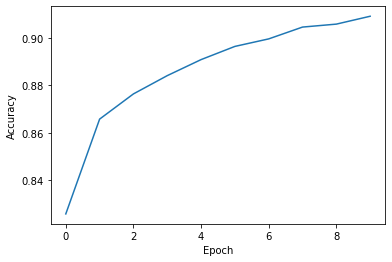

In [22]:
plt.plot(fitting.history['accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [37]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print("\nTest accuracy: %s " % test_acc)

10000/10000 - 1s - loss: 0.3332 - accuracy: 0.8880

Test accuracy: 0.888 


## Make predictions

In [57]:
print(np.expand_dims(test_images[0], 0).shape)

(1, 28, 28)


In [56]:
model.predict(np.expand_dims(test_images[0], 0))

array([[-11.345467 , -15.150547 , -12.019233 , -12.586712 , -14.007178 ,
         -2.7131784, -12.125611 ,  -0.5166193, -11.792411 ,   3.4188466]],
      dtype=float32)

In [46]:
probability_model = keras.Sequential([model, keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

In [48]:
predictions[0]

array([3.7897698e-07, 8.4350447e-09, 1.9319586e-07, 1.0953327e-07,
       2.6463406e-08, 2.1260204e-03, 1.7369969e-07, 1.9121444e-02,
       2.4238568e-07, 9.7875136e-01], dtype=float32)

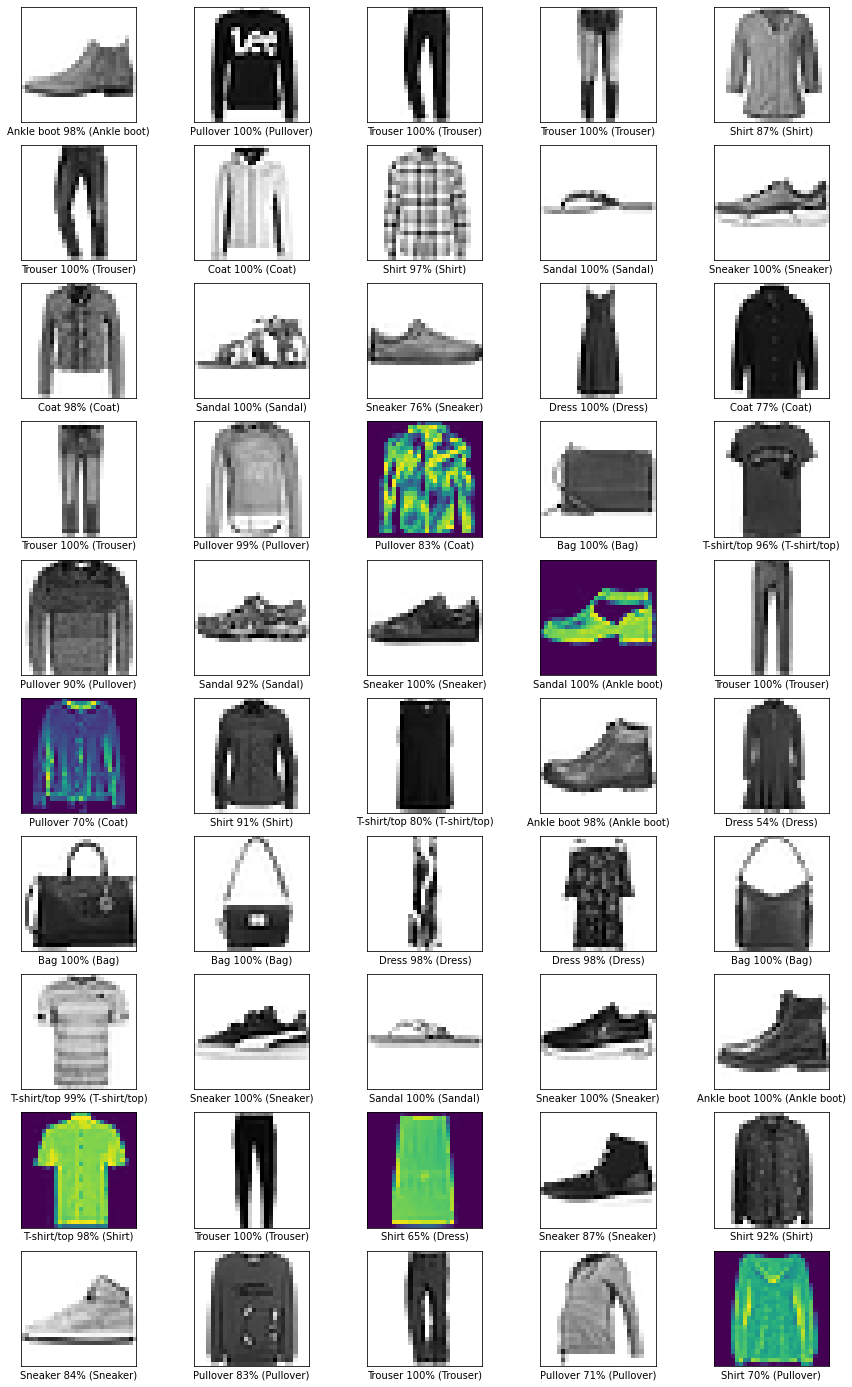

In [65]:
plt.figure(figsize=(15,25))
for i in range(50):
    plt.subplot(10,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if(np.argmax(predictions[i])==test_labels[i]):         # errors will be colored
        plt.imshow(test_images[i], cmap=plt.cm.binary) 
    else:
        plt.imshow(test_images[i])      
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[np.argmax(predictions[i])],
                                100*np.max(predictions[i]),
                                class_names[test_labels[i]]))
plt.show()

## The weights

In [35]:
model.get_weights()

[array([[-0.17976639,  0.1298908 ,  0.16297774, ..., -0.05736179,
          0.01751893, -0.04138918],
        [-0.13521692, -0.00192533, -0.31708026, ..., -0.18727486,
         -0.12770098, -0.07630491],
        [ 0.04859936,  0.39851376, -0.27455384, ...,  0.09378328,
         -0.19120803,  0.00778139],
        ...,
        [ 0.34704295,  0.05848238,  0.02491074, ...,  0.18837549,
         -0.16416433, -0.02205652],
        [ 0.69176584,  0.18327175, -0.21712707, ...,  0.58454067,
          0.08933322, -0.04408545],
        [ 0.14769739, -0.05229276, -0.52096194, ...,  0.06881758,
          0.20120992, -0.00870172]], dtype=float32),
 array([-0.22292647,  0.4699438 ,  0.2889085 ,  0.13071258,  0.5691582 ,
         0.12167069,  0.04303062,  0.3017867 ,  0.14690086,  0.2057321 ,
         0.54327226,  0.28358945,  0.4084994 ,  0.4173774 ,  0.300919  ,
        -0.00572937, -0.1681025 , -0.08246998,  0.14683896, -0.02268933,
         0.52609533, -0.26678947, -0.09386773, -0.34301183,  0.064

## Model 

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [48]:
for i in range(4):
    print(np.array(model.get_weights()[i]).shape)

(784, 128)
(128,)
(128, 10)
(10,)
